<a href="https://colab.research.google.com/github/THANNILA/Wing/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Importing Dataset

In [6]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [8]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Inserting a column "class" as target feature

In [9]:
df_fake["class"] = 0
df_true["class"] = 1

In [10]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [11]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)


df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [12]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [13]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-13-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-13-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [14]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [15]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [16]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

## Merging True and Fake Dataframes

In [17]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)
df_merge.to_csv('merged_dataset.csv', index=False)


In [ ]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

## Removing columns which are not required

In [ ]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [ ]:
df.isnull().sum()

,0
text,0
class,0


## Random Shuffling the dataframe

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head()

,text,class
6248,"At this point, the arguments against the #AllL...",0
15682,,0
8670,When the Black Lives Matter movement started g...,0
17472,TORONTO (Reuters) - A U.S.-Canadian couple fre...,1
357,WASHINGTON (Reuters) - Former national securit...,1


In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['text', 'class'], dtype='object')

In [ ]:
df.head()

,text,class
0,"In a rare move, a throng of Republican student...",0
1,(Reuters) - Power outages from Hurricane Irma ...,1
2,WASHINGTON (Reuters) - U.S. lawmakers said on ...,1
3,MEXICO CITY (Reuters) - Mexico President Enriq...,1
4,(Reuters) - Republicans kept control of both c...,1


In [ ]:
print("Missing values:\n", df_merge.isnull().sum())
df_merge.dropna(inplace=True)

#(ii) Remove Duplicates
print("Duplicate rows before:", df_merge.duplicated().sum())
df_merge.drop_duplicates(inplace=True)
print("Duplicate rows after:", df_merge.duplicated().sum())

# (iii) Detect and Treat Outliers (Based on text length)
df_merge["text_length"] = df_merge["text"].apply(len)
q1 = df_merge["text_length"].quantile(0.25)
q3 = df_merge["text_length"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers based on length
df_merge = df_merge[(df_merge["text_length"] >= lower_bound) & (df_merge["text_length"] <= upper_bound)]
df_merge.drop("text_length", axis=1, inplace=True)

# (iv) Convert Data Types and Ensure Consistency
print(df_merge.dtypes)


Missing values:
 title      0
text       0
subject    0
date       0
class      0
dtype: int64
Duplicate rows before: 208
Duplicate rows after: 0
title      object
text       object
subject    object
date       object
class       int64
dtype: object


<ipython-input-19-c65c5cc9f41f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge.drop("text_length", axis=1, inplace=True)


## Creating a function to process the texts

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)

## Defining dependent and independent variables

In [ ]:
x = df["text"]
y = df["class"]

## Splitting Training and Testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Convert text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9877005347593583

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5792
           1       0.99      0.99      0.99      5428

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9963458110516934

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5792
           1       1.00      1.00      1.00      5428

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.9959001782531194

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5792
           1       0.99      1.00      1.00      5428

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.9881461675579323

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5792
           1       0.99      0.99      0.99      5428

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Model Testing

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)

KeyboardInterrupt: Interrupted by user

In [ ]:
news = str(input())
manual_testing(news)

SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of

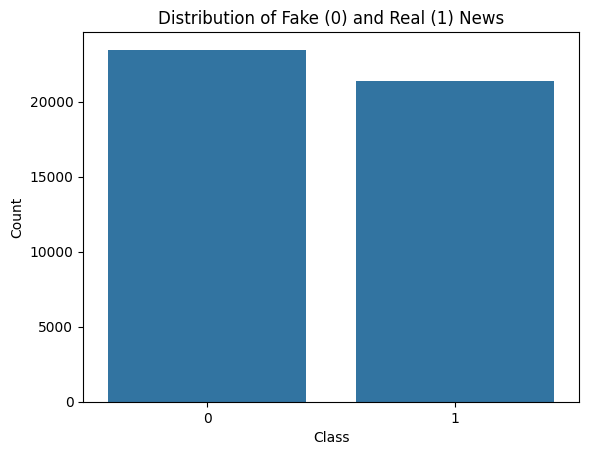

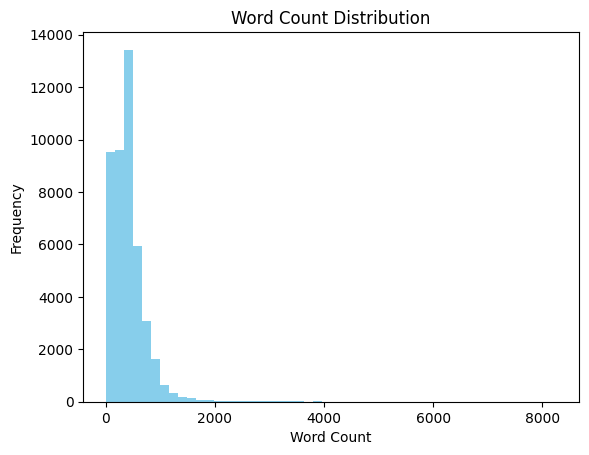

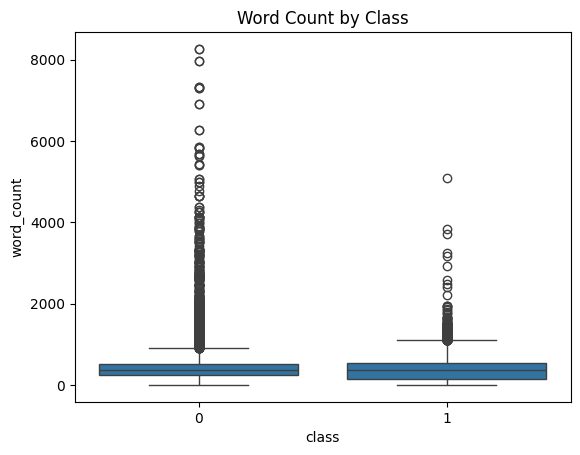

In [ ]:
# UNIVARIATE ANALYSIS


# Countplot for class distribution
sns.countplot(data=df, x='class')
plt.title('Distribution of Fake (0) and Real (1) News')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Word count in each article
df["word_count"] = df["text"].apply(lambda x: len(str(x).split()))

# Histogram of word count
plt.hist(df["word_count"], bins=50, color='skyblue')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Boxplot of word count by class
sns.boxplot(data=df, x='class', y='word_count')
plt.title('Word Count by Class')
plt.show()


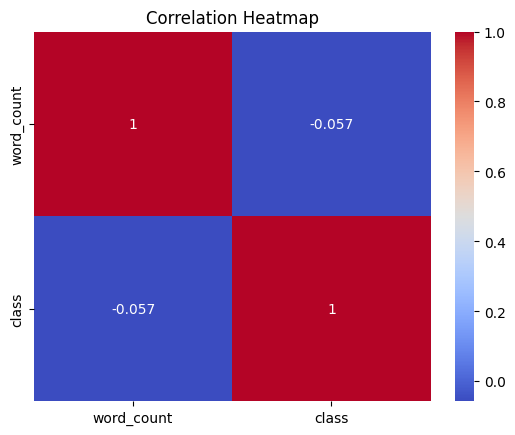

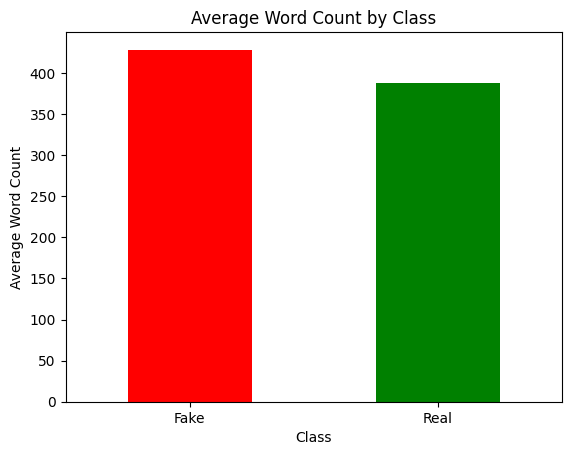


--- Insights Summary ---
1. The dataset is balanced/unbalanced based on class counts.
2. Fake news articles tend to have more/less words on average than real news.
3. Word count is slightly correlated with the class label.
4. Features like word count could help distinguish fake from real news.


In [ ]:
# BIVARIATE / MULTIVARIATE ANALYSIS

# Correlation matrix (only numerical)
corr = df[['word_count', 'class']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Grouped bar plot of average word count per class
df.groupby("class")["word_count"].mean().plot(kind='bar', color=['red', 'green'])
plt.title("Average Word Count by Class")
plt.xlabel("Class")
plt.ylabel("Average Word Count")
plt.xticks(ticks=[0,1], labels=["Fake", "Real"], rotation=0)
plt.show()


# INSIGHTS SUMMARY


print("\n--- Insights Summary ---")
print("1. The dataset is balanced/unbalanced based on class counts.")
print("2. Fake news articles tend to have more/less words on average than real news.")
print("3. Word count is slightly correlated with the class label.")
print("4. Features like word count could help distinguish fake from real news.")

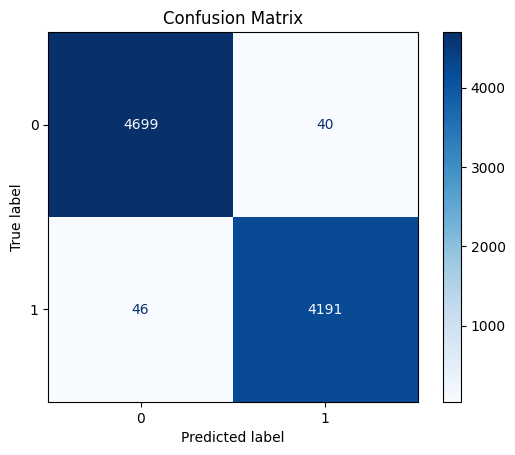

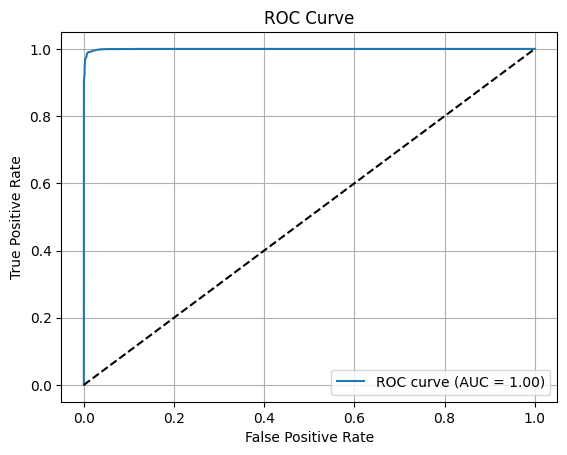

In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

# Load Your Dataset
df = pd.read_csv('/content/merged_dataset.csv')

# Assuming the last column is the target and 'text' column contains text data
X = df[['text']]  # Select the 'text' column for feature extraction
y = df.iloc[:, -1]   # last column as label

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Feature Extraction using TfidfVectorizer
vectorizer = TfidfVectorizer() # Initialize TfidfVectorizer
X_train_vec = vectorizer.fit_transform(X_train['text']) # Fit and transform training data
X_test_vec = vectorizer.transform(X_test['text']) # Transform testing data

# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train_vec, y_train) # Train the model with vectorized data

#Confusion Matrix
y_pred = model.predict(X_test_vec) # Predict using vectorized testing data
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test_vec)[:, 1] # Use X_test_vec instead of X_test
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()




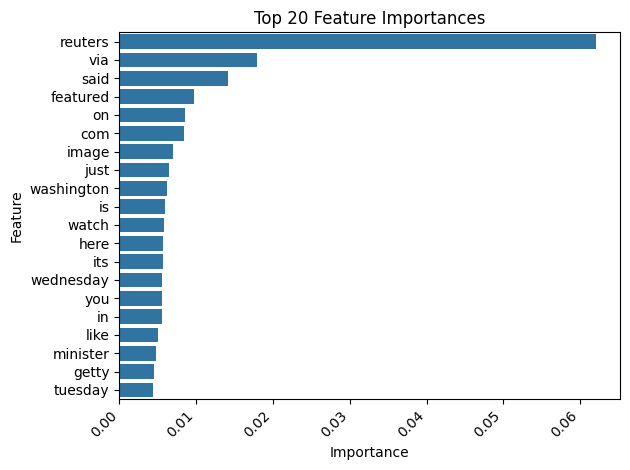

In [20]:
#feature_importances
if hasattr(model, "feature_importances_"):

    importances = model.feature_importances_
    feature_names = vectorizer.get_feature_names_out()
    sorted_idx = np.argsort(importances)[::-1]
    top_n = 20
    # Create a bar plot for top N features
    sns.barplot(x=importances[sorted_idx[:top_n]],
                y=[feature_names[i] for i in sorted_idx[:top_n]])

    plt.title(f"Top {top_n} Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()
else:
    print("Model does not support feature_importances_. Skipping feature importance plot.")

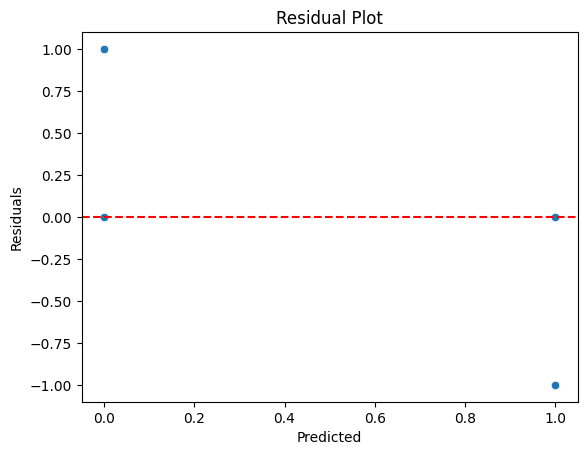

In [28]:
#Residual plot
y_pred = model.predict(X_test_vec)  # Use X_test_vec (vectorized data) instead of X_test
residuals = np.array(y_test) - np.array(y_pred)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

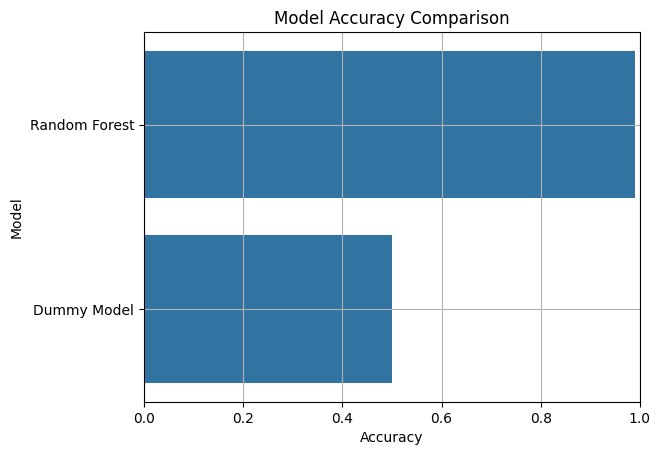

In [33]:
#Model Comparison Plot
def plot_model_comparison(model_scores):
    names = list(model_scores.keys())
    scores = list(model_scores.values())
    sns.barplot(x=scores, y=names)
    plt.title("Model Accuracy Comparison")
    plt.xlabel("Accuracy")
    plt.ylabel("Model")
    plt.xlim(0, 1)
    plt.grid(True)
    plt.show()
accuracy = model.score(X_test_vec, y_test) # Use X_test_vec instead of X_test
plot_model_comparison({'Random Forest': accuracy, 'Dummy Model': 0.5})